<a href="https://colab.research.google.com/github/Venuram/Machine-Learning-Projects/blob/master/Decision_Tree_on_Donor_Chose_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree on Donor Chose Dataset

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   <li><b>Task 2: </b>For this task consider set-1 features. Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  Note: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1TeNeIUHPKZZr0ZqrZ0gKEV7cCSw9ikIQ'}) # replace the id with id of file you want to access
downloaded.GetContentFile('preprocessed_data.csv')

In [0]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

In [0]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [0]:
!ls
!pwd

adc.json	   glove.6B.200d.txt  glove.6B.50d.txt	preprocessed_data.csv
glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip	sample_data
/content


In [0]:
import numpy as np

print('Indexing word vectors.')

embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Found 400000 word vectors.


In [0]:
!pip install --upgrade pip
!pip install -U -q pydrive
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null

!apt-get -y install -qq google-drive-ocamlfuse fuse

from google.colab import auth
auth.authenticate_user()
# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio.plotly import plot, iplot
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

<h1>1. Decision Tree </h1>

## 1.1 Loading Data

In [0]:
import pandas
data = pandas.read_csv('preprocessed_data.csv')
data.head()

school_state  ...   price
0           ca  ...  725.05
1           ut  ...  213.03
2           ca  ...  329.00
3           ga  ...  481.04
4           wa  ...   17.74

[5 rows x 9 columns]

In [0]:
Y = data['project_is_approved'].values
len(Y)

109248

In [0]:
X = data.drop(['project_is_approved'], axis = 1)
X.head(2)

school_state  ...   price
0           ca  ...  725.05
1           ut  ...  213.03

[2 rows x 8 columns]

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

<h3> Splitting data as train and test parts

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label


from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split( X, Y, test_size = 0.33, stratify = Y)
xtrain, xcv, ytrain, ycv = train_test_split( xtrain, ytrain, test_size = 0.33, stratify = ytrain )

print( xtrain.shape )
print( xcv.shape )
print( xtest.shape )

print( ytrain.shape )
print( ycv.shape )
print( ytest.shape )

(49041, 8)
(24155, 8)
(36052, 8)
(49041,)
(24155,)
(36052,)


<h3> Loading the Glove Model in order to perform TFIDF Weighted Word2Vec

In [0]:
def loadGloveModel():
    
    print ("Loading Glove Model")
    
    f = open('glove.6B.300d.txt','r', encoding = 'utf8')
    
    model = {}
    
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    
    print ("Done.",len(model)," words loaded!")
    
    return model

In [0]:
model = loadGloveModel()

1178it [00:00, 11776.98it/s]

Loading Glove Model


400000it [00:34, 11710.02it/s]


Done. 400000  words loaded!


In [0]:
glove_words = set(model.keys())

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re
def decontracted(phrase):
# specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
# general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(xtrain['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
def tf_idf_done(word_list):
    train_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(word_list): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split():#.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
              #vec = model.wv[word]  
              vec = model[word] # getting the vector for each word
# here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
              tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) 
              vector += (vec * tf_idf) # calculating tfidf weighted w2v
              tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        train_title_tfidf_w2v_vectors.append(vector)
    print(len(train_title_tfidf_w2v_vectors))
    print(len(train_title_tfidf_w2v_vectors[0]))
    return train_title_tfidf_w2v_vectors

In [0]:
train_tfidf_w2v_vectors=tf_idf_done(xtrain['essay'])
test_tfidf_w2v_vectors=tf_idf_done(xtest['essay'])
cv_tfidf_w2v_vectors=tf_idf_done(xcv['essay'])

  0%|          | 58/36052 [00:00<01:02, 579.98it/s]

49041
300


  0%|          | 62/24155 [00:00<00:39, 612.22it/s]

36052
300


100%|██████████| 24155/24155 [00:43<00:00, 553.94it/s]

24155
300


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer( min_df = 10, ngram_range=(1,4) )
vect.fit(xtrain['essay'].values)
xtrEssayBOW = vect.transform(xtrain['essay'].values ) 
xcvEssayBOW = vect.transform(xcv['essay'].values ) 
xteEssayBOW = vect.transform(xtest['essay'].values )

print( xtrEssayBOW.shape )
print( xcvEssayBOW.shape )
print( xteEssayBOW.shape )

(49041, 166233)
(24155, 166233)
(36052, 166233)


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
  
tfidfvect = TfidfVectorizer( min_df = 10 )

tfidfvect.fit( xtrain['essay'].values )

xtrEssayTFIDF = tfidfvect.transform( xtrain['essay'].values )
xcvEssayTFIDF = tfidfvect.transform( xcv['essay'].values )
xteEssayTFIDF = tfidfvect.transform( xtest['essay'].values )

print( xtrEssayTFIDF.shape )
print( xcvEssayTFIDF.shape )
print( xteEssayTFIDF.shape )

(49041, 12084)
(24155, 12084)
(36052, 12084)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

from sklearn.feature_extraction.text import CountVectorizer
vectSubCat = CountVectorizer()
#vectTF = CountVectorizer( min_df = 10, ngram_range = (1,4) )

vectSubCat.fit( xtrain['clean_subcategories'].values )

xtrclnsubBOW = vectSubCat.transform( xtrain['clean_subcategories'].values )
xcvclnsubBOW = vectSubCat.transform( xcv['clean_subcategories'].values )
xteclnsubBOW = vectSubCat.transform( xtest['clean_subcategories'].values )

print( xtrclnsubBOW.shape )
print( xcvclnsubBOW.shape )
print( xteclnsubBOW.shape )

(49041, 30)
(24155, 30)
(36052, 30)


In [0]:
tfidfvect.fit( xtrain['clean_subcategories'].values )

xtrClnsubTFIDF = tfidfvect.transform( xtrain['clean_subcategories'].values )
xcvClnsubTFIDF = tfidfvect.transform( xcv['clean_subcategories'].values )
xteClnsubTFIDF = tfidfvect.transform( xtest['clean_subcategories'].values )

print( xtrClnsubTFIDF.shape )
print( xcvClnsubTFIDF.shape )
print( xteClnsubTFIDF.shape )

(49041, 30)
(24155, 30)
(36052, 30)


In [0]:
vectclncat = CountVectorizer( min_df = 10, ngram_range = (1,4) )

vectclncat.fit( xtrain['clean_categories'].values )

xtrClnctBOW = vectclncat.transform( xtrain['clean_categories'].values )
xcvClnctBOW = vectclncat.transform( xcv['clean_categories'].values )
xteClnctBOW = vectclncat.transform( xtest['clean_categories'].values )

print( xtrClnctBOW.shape, ytrain.shape )
print( xcvClnctBOW.shape, ycv.shape )
print( xteClnctBOW.shape, ytest.shape )

(49041, 44) (49041,)
(24155, 44) (24155,)
(36052, 44) (36052,)


In [0]:
tfidfvect.fit( xtrain['clean_categories'].values )

xtrClnctTFIDF = tfidfvect.transform( xtrain['clean_categories'].values )
xcvClnctTFIDF = tfidfvect.transform( xcv['clean_categories'].values )
xteClnctTFIDF = tfidfvect.transform( xtest['clean_categories'].values )

print( xtrClnctTFIDF.shape )
print( xcvClnctTFIDF.shape )
print( xteClnctTFIDF.shape )

(49041, 9)
(24155, 9)
(36052, 9)


In [0]:
vectState = CountVectorizer()
vectState.fit(xtrain['school_state'].values) # fit has to happen only on train data
vectState._validate_vocabulary()

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectState.transform(xtrain['school_state'].values)
X_cv_state_ohe = vectState.transform(xcv['school_state'].values)
X_test_state_ohe = vectState.transform(xtest['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, ytrain.shape)
print(X_cv_state_ohe.shape, ycv.shape)
print(X_test_state_ohe.shape, ytest.shape)
print(vectState.get_feature_names())

After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [0]:
tfidfvect.fit( xtrain['school_state'].values )

X_train_state_ohe_TFIDF = tfidfvect.transform( xtrain['school_state'].values )
X_cv_state_ohe_TFIDF = tfidfvect.transform( xcv['school_state'].values )
X_test_state_ohe_TFIDF = tfidfvect.transform( xtest['school_state'].values )

print( X_train_state_ohe_TFIDF.shape, ytrain.shape )
print( X_cv_state_ohe_TFIDF.shape, ycv.shape )
print( X_test_state_ohe_TFIDF.shape, ytest.shape )

(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)


In [0]:
vectPrefix = CountVectorizer()
vectPrefix.fit(xtrain['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectPrefix.transform(xtrain['teacher_prefix'].values)
X_cv_teacher_ohe = vectPrefix.transform(xcv['teacher_prefix'].values)
X_test_teacher_ohe = vectPrefix.transform(xtest['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, ytrain.shape)
print(X_cv_teacher_ohe.shape, ycv.shape)
print(X_test_teacher_ohe.shape, ytest.shape)
print(vectPrefix.get_feature_names())

After vectorizations
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [0]:
tfidfvect.fit( xtrain['teacher_prefix'].values )

X_train_teacher_ohe_TFIDF = tfidfvect.transform( xtrain['teacher_prefix'].values )
X_cv_teacher_ohe_TFIDF = tfidfvect.transform( xcv['teacher_prefix'].values )
X_test_teacher_ohe_TFIDF = tfidfvect.transform( xtest['teacher_prefix'].values )

print("After vectorizations")
print( X_train_teacher_ohe_TFIDF.shape, ytrain.shape )
print( X_cv_teacher_ohe_TFIDF.shape, ycv.shape )
print( X_test_teacher_ohe_TFIDF.shape, ytest.shape )

After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)


In [0]:
vectGCat = CountVectorizer()
vectGCat.fit(xtrain['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectGCat.transform(xtrain['project_grade_category'].values)
X_cv_grade_ohe = vectGCat.transform(xcv['project_grade_category'].values)
X_test_grade_ohe = vectGCat.transform(xtest['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, ytrain.shape)
print(X_cv_grade_ohe.shape, ycv.shape)
print(X_test_grade_ohe.shape, ytest.shape)
print(vectGCat.get_feature_names())

After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [0]:
vectorizer = CountVectorizer()

tfidfvect.fit( xtrain['project_grade_category'].values )

X_train_grade_ohe_TFIDF = tfidfvect.transform( xtrain['project_grade_category'].values )
X_cv_grade_ohe_TFIDF = tfidfvect.transform( xcv['project_grade_category'].values )
X_test_grade_ohe_TFIDF = tfidfvect.transform( xtest['project_grade_category'].values )

print("After vectorizations")
print( X_train_grade_ohe_TFIDF.shape, ytrain.shape )
print( X_cv_grade_ohe_TFIDF.shape, ycv.shape )
print( X_test_grade_ohe_TFIDF.shape, ytest.shape )

After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)


In [0]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(xtrain['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(xtrain['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(xcv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(xtest['price'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_price_norm.shape, ytrain.shape)
print(X_cv_price_norm.shape, ycv.shape)
print(X_test_price_norm.shape, ytest.shape)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [0]:
norm = Normalizer()

norm.fit( xtrain['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )

xtrPrev = norm.transform( xtrain['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )
xcvPrev = norm.transform( xcv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )
xtePrev = norm.transform( xtest['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )

print( xtrPrev.shape )
print( xcvPrev.shape )
print( xtePrev.shape )

(49041, 1)
(24155, 1)
(36052, 1)


In [0]:
#Set 1: categorical, numerical features + preprocessed_eassay (BOW)
from scipy.sparse import hstack

xtr1 = hstack(( xtrEssayBOW, X_train_state_ohe, xtrClnctBOW, xtrclnsubBOW, X_train_price_norm, xtrPrev, X_train_teacher_ohe )).tocsr()
xcv1 = hstack(( xcvEssayBOW, X_cv_state_ohe, xcvClnctBOW, xcvclnsubBOW, X_cv_price_norm, xcvPrev, X_cv_teacher_ohe )).tocsr()
xte1 = hstack(( xteEssayBOW, X_test_state_ohe, xteClnctBOW, xteclnsubBOW, X_test_price_norm, xtePrev, X_test_teacher_ohe )).tocsr()

print( xtr1.shape, ytrain.shape )
print( xcv1.shape, ycv.shape )
print( xte1.shape, ytest.shape )

(49041, 166365) (49041,)
(24155, 166365) (24155,)
(36052, 166365) (36052,)


In [0]:
#Set 2: categorical, numerical features + preprocessed_eassay (TFIDF)

xtr2 = hstack(( xtrEssayTFIDF, X_train_state_ohe_TFIDF, xtrClnctTFIDF, xtrClnsubTFIDF, X_train_price_norm, xtrPrev, X_train_teacher_ohe_TFIDF )).tocsr()
xcv2 = hstack(( xcvEssayTFIDF, X_cv_state_ohe_TFIDF, xcvClnctTFIDF, xcvClnsubTFIDF, X_cv_price_norm, xcvPrev, X_cv_teacher_ohe_TFIDF )).tocsr()
xte2 = hstack(( xteEssayTFIDF, X_test_state_ohe_TFIDF, xteClnctTFIDF, xteClnsubTFIDF, X_test_price_norm, xtePrev, X_test_teacher_ohe_TFIDF )).tocsr()

print( xtr2.shape, ytrain.shape )
print( xcv2.shape, ycv.shape )
print( xte2.shape, ytest.shape )

(49041, 12180) (49041,)
(24155, 12180) (24155,)
(36052, 12180) (36052,)


In [0]:
import numpy
s=numpy.array(train_tfidf_w2v_vectors)
#print(X_train_project_grade_category.shape)
print(s.shape)

(49041, 300)


In [0]:
from scipy.sparse import hstack
#Set 3: categorical, numerical features + preprocessed_eassay (TFIDF Weighted W2V)
xtr3 = hstack(( train_tfidf_w2v_vectors, X_train_state_ohe, xtrClnctBOW, xtrclnsubBOW, X_train_price_norm, xtrPrev, X_train_teacher_ohe )).tocsr()
xcv3 = hstack(( cv_tfidf_w2v_vectors, X_cv_state_ohe, xcvClnctBOW, xcvclnsubBOW, X_cv_price_norm, xcvPrev, X_cv_teacher_ohe )).tocsr()
xte3 = hstack(( test_tfidf_w2v_vectors, X_test_state_ohe, xteClnctBOW, xteclnsubBOW, X_test_price_norm, xtePrev, X_test_teacher_ohe )).tocsr()

print( xtr3.shape, ytrain.shape )
print( xcv3.shape, ycv.shape )
print( xte3.shape, ytest.shape )

(49041, 432) (49041,)
(24155, 432) (24155,)
(36052, 432) (36052,)


<h2>1.5 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

<h1> Applying Decision trees on BOW

Most of the logics and codes were inspired from the given github link which was cleverly attempted.

In [0]:
# Code reference : https://github.com/shashimanyam/DECISION-TREE-ON-DONORSCHOOSE-DATASET/blob/master/DECISION%20TREE%20ON%20DONORSCHOOSE.ipynb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
clss = DecisionTreeClassifier(criterion='gini', splitter='best', class_weight = 'balanced')
params = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}
classifier1 = GridSearchCV(clss, params, cv=3, scoring='roc_auc',return_train_score=True)
mod1 = classifier1.fit(xtr1, ytrain)

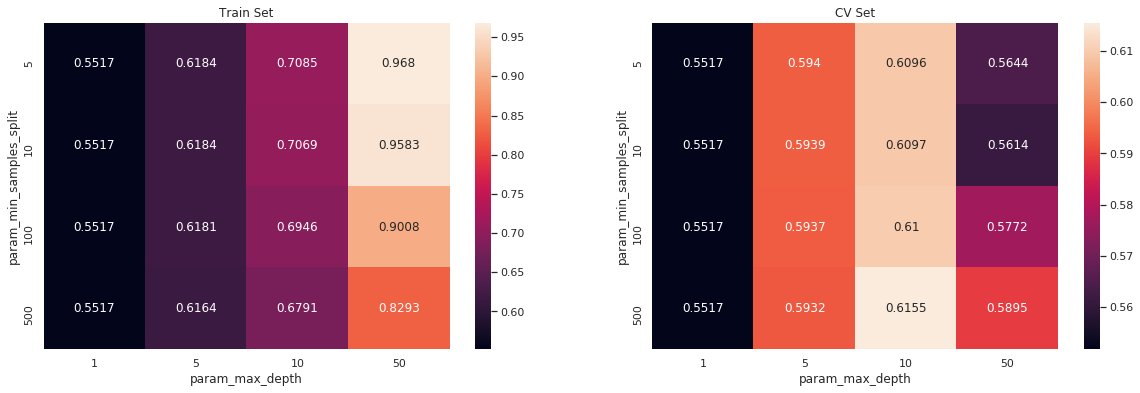

In [0]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set()
max_scores1 = pd.DataFrame(classifier1.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [0]:
max_scores1.head()

In [0]:
print(classifier1.best_estimator_)
#Mean cross-validated score of the best_estimator
print(classifier1.score(xtr1, ytrain))
print(classifier1.score(xte1, ytest))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.6743376637555751
0.6160479758275312


In [0]:
# Best tune parameters
best_tune_parameters=[{'max_depth':[10], 'min_samples_split':[500] } ]

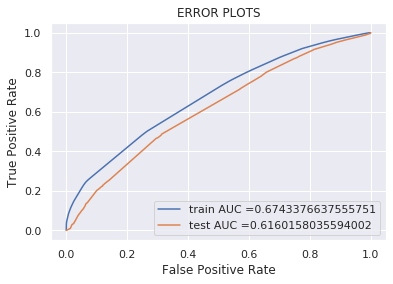

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
classifiers2 = GridSearchCV( DecisionTreeClassifier(class_weight = 'balanced'),best_tune_parameters)
clss2 = DecisionTreeClassifier(max_depth=10, min_samples_split=500, class_weight = 'balanced')
classifiers2.fit(xtr1, ytrain)
clss2.fit(xtr1, ytrain)
classifiers2.fit(xtr1, ytrain)
y_train_pred1 = classifiers2.predict_proba(xtr1) [:,1]
y_test_pred1 = classifiers2.predict_proba(xte1) [:,1]
train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(ytrain, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(ytest, y_test_pred1)
plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [0]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", np.round(max(tpr*(1-fpr)),2) , "for threshold", np.round(t,2))
    predictions = []
    global predictions1 # make it global
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1= predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.37 for threshold 0.49
the maximum value of tpr*(1-fpr) 0.33 for threshold 0.49


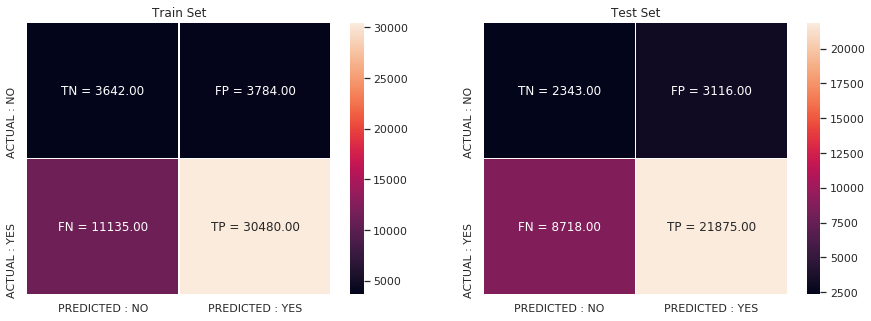

In [0]:
import seaborn as sns
import numpy as np
sns.set()
from sklearn.metrics import confusion_matrix
con_m_train = confusion_matrix(ytrain, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(ytest, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_m_test.flatten())])).reshape(2,2)
sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

In [0]:
#Get the False positives datapoints
xtest['essay'].values[1]

'i privilege teaching amazing unique group 1st grade students year these young learners exude inspiring enthusiasm excitement learning life friends interests the year spend together filled tremendous growth academic achievements social gains lots lost teeth if child not learn way teach maybe teach way learn ignacio estrada i work title one school large bilingual population the majority students speak english spanish english polish our school thrives close sense community stems supportive administration helpful colleagues i currently work co taught first grade classroom focuses meeting every student classroom needs our classroom full diverse learners range abilities backgrounds we differentiate meet needs diverse learners also gifted students students range beginning readers advanced we strive truly know understand students believe crucial caring effective teacher do enjoy reading hard chair makes impossible get comfortable do write best feel inspired sitting wobbly desk large fit body 

<h2>1.6 Getting top features using `feature_importances_`</h2>

In [0]:
#https://www.google.com/search?q=geeks+for+geeks+false+positive&rlz=1C1SQJL_enIN849IN849&oq=geeks+for+geeks+false+positive&aqs=chrome..69i57j33l5.6431j0j7&sourceid=chrome&ie=UTF-8
#https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb
fpi = []
for i in range(len(ytest)) :
  if (ytest[i] == 0) & (predictions1[i] == 1) :
    fpi.append(i)
fp_essay1 = []
for i in fpi :
  fp_essay1.append(xtest['essay'].values[i])

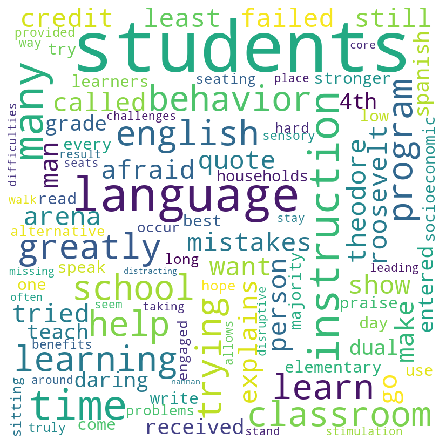

In [0]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay1 :
  val = str(val)
  tokens = val.split()
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
for words in tokens :
  comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [0]:
# first get the columns:
cols = xtest.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)

# get the data of the false pisitives
for i in fpi : # (in fpi all the false positives data points indexes)
    
  X_test_falsePos1 = X_test_falsePos1.append(xtest.filter(items=[i], axis=0))

X_test_falsePos1.head(1)
len(X_test_falsePos1)

1060

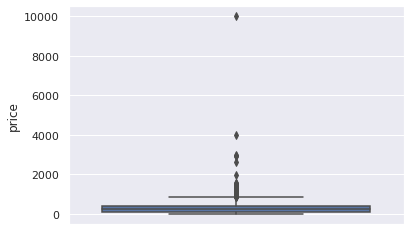

In [0]:
##Box Plot (FP 'price')
sns.boxplot(y='price', data=X_test_falsePos1)

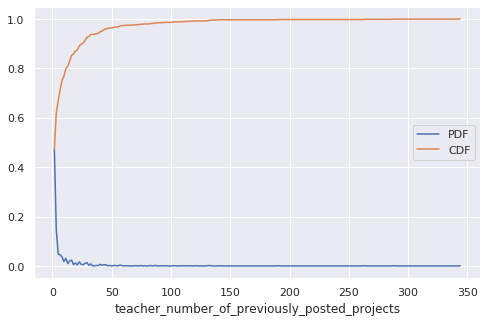

In [0]:
##PDF (FP ,teacher_number_of_previously_posted_projects)
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'],
bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()

<h1> Applying Decision trees on TFIDF

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
clss3 = DecisionTreeClassifier(criterion='gini', splitter='best', class_weight = 'balanced')
params = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}
classifier3 = GridSearchCV(clss3, params, cv=3, scoring='roc_auc',return_train_score=True)
mod1 = classifier3.fit(xtr2, ytrain)

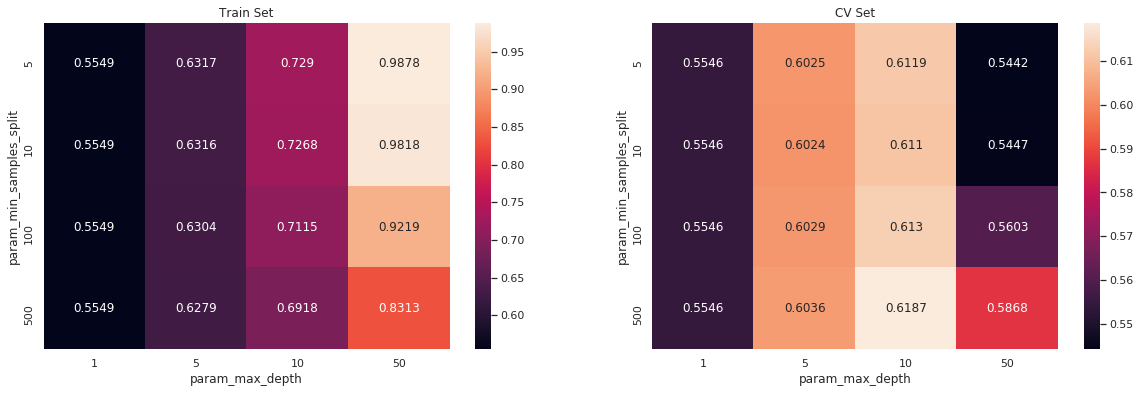

In [0]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set()
max_scores1 = pd.DataFrame(classifier3.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [0]:
print(classifier3.best_estimator_)
#Mean cross-validated score of the best_estimator
print(classifier3.score(xtr2, ytrain))
print(classifier3.score(xte2, ytest))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.6901122757152885
0.6218429599679444


In [0]:
# Best tune parameters
best_tune_parameters=[{'max_depth':[10], 'min_samples_split':[500] } ]

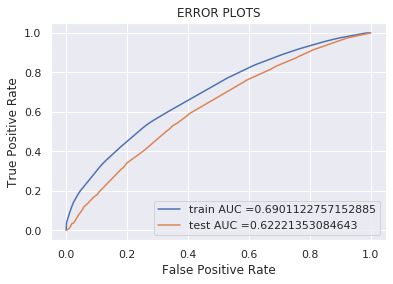

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
classifiers3 = GridSearchCV( DecisionTreeClassifier(class_weight = 'balanced'),best_tune_parameters)
clss3 = DecisionTreeClassifier(max_depth=10, min_samples_split=500, class_weight = 'balanced')
classifiers3.fit(xtr2, ytrain)
clss3.fit(xtr2, ytrain)
classifiers3.fit(xtr2, ytrain)
y_train_pred2 = classifiers3.predict_proba(xtr2) [:,1]
y_test_pred2 = classifiers3.predict_proba(xte2) [:,1]
train_fpr2, train_tpr2, tr_thresholds2 = roc_curve(ytrain, y_train_pred2)
test_fpr2, test_tpr2, te_thresholds2 = roc_curve(ytest, y_test_pred2)
plt.plot(train_fpr2, train_tpr2, label="train AUC ="+str(auc(train_fpr2, train_tpr2)))
plt.plot(test_fpr2, test_tpr2, label="test AUC ="+str(auc(test_fpr2, test_tpr2)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

the maximum value of tpr*(1-fpr) 0.4 for threshold 0.47
the maximum value of tpr*(1-fpr) 0.35 for threshold 0.49


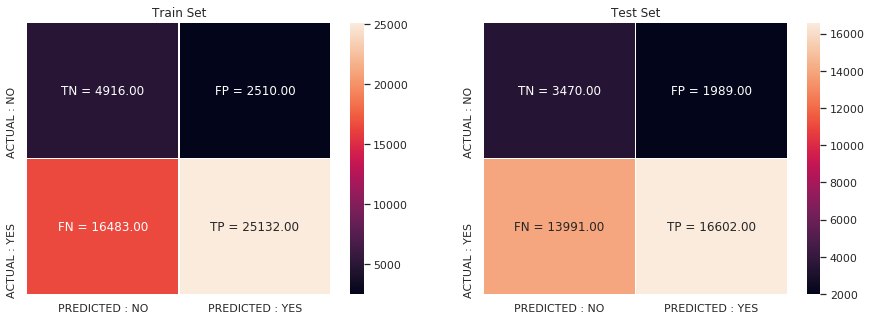

In [0]:
import seaborn as sns
import numpy as np
sns.set()
from sklearn.metrics import confusion_matrix
con_m_train = confusion_matrix(ytrain, predict(y_train_pred2, tr_thresholds2, train_fpr2, train_tpr2))
con_m_test = confusion_matrix(ytest, predict(y_test_pred2, te_thresholds2, test_fpr2, test_tpr2))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_m_test.flatten())])).reshape(2,2)
sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

In [0]:
fpi = []
for i in range(len(ytest)) :
  if (ytest[i] == 0) & (predictions1[i] == 1) :
    fpi.append(i)
fp_essay1 = []
for i in fpi :
  fp_essay1.append(xtest['essay'].values[i])

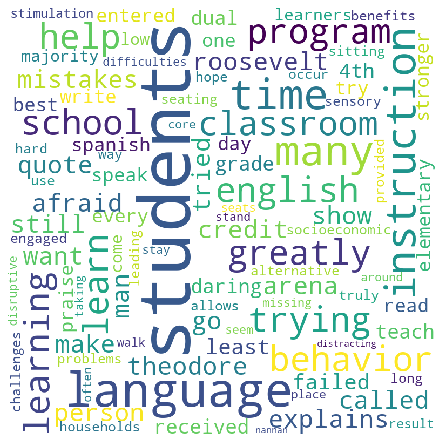

In [0]:
# Word cloud of essay
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay1 :
  val = str(val)
  tokens = val.split()
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
for words in tokens :
  comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,
min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [0]:
# first get the columns:
cols = xtest.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)
# get the data of the false pisitives
for i in fpi : # (in fpi all the false positives data points indexes)
  X_test_falsePos1 = X_test_falsePos1.append(xtest.filter(items=[i], axis=0))

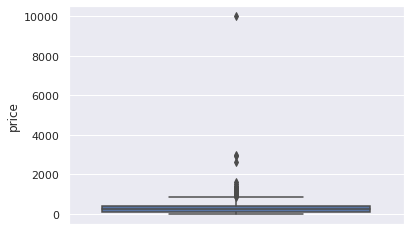

In [0]:
#Box Plot (FP 'price')
sns.boxplot(y='price', data=X_test_falsePos1)

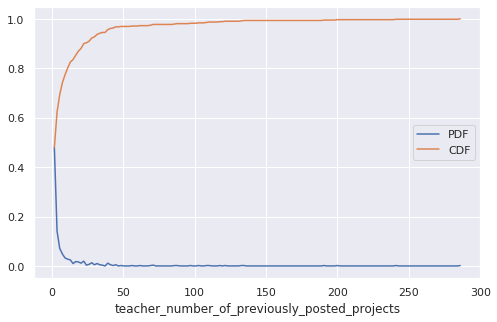

In [0]:
#PDF (FP ,teacher_number_of_previously_posted_projects)
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'],bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()

<h1> Decision tree on Important features

In [0]:
def selectKImportance(model, X, k=5):
    return X[:,model.best_estimator_.feature_importances_.argsort()[::-1][:k]]

In [0]:
# for tf-idf set 2
X_set5_train = selectKImportance(classifier3, xtr2,5000)
X_set5_test = selectKImportance(classifier3, xte2, 5000)

print(X_set5_train.shape)
print(X_set5_test.shape)

(49041, 5000)
(36052, 5000)


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
clss4 = DecisionTreeClassifier(criterion='gini', splitter='best', class_weight = 'balanced')
params = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}
classifier4 = GridSearchCV(clss4, params, cv=3, scoring='roc_auc',return_train_score=True)
mod4 = classifier4.fit(X_set5_train, ytrain)

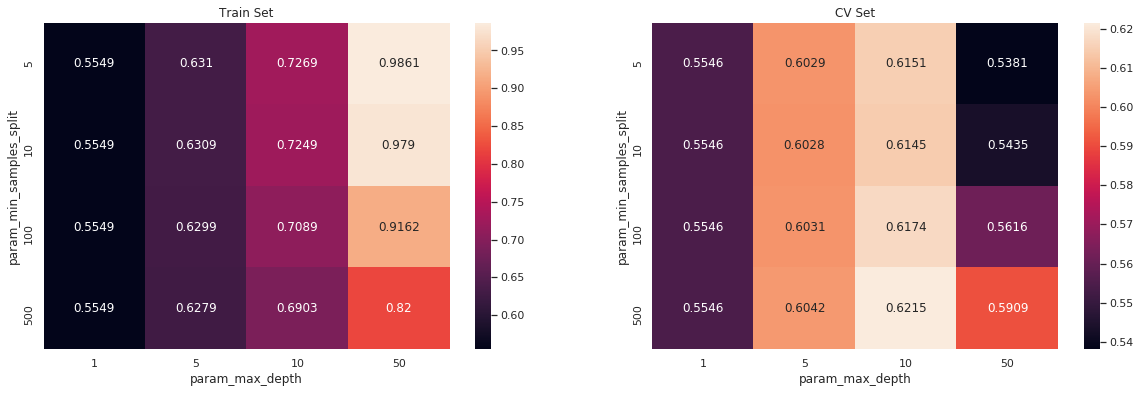

In [0]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set()
max_scores1 = pd.DataFrame(classifier4.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [0]:
print(classifier4.best_estimator_)
#Mean cross-validated score of the best_estimator
print(classifier4.score(X_set5_train, ytrain))
print(classifier4.score(X_set5_test, ytest))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.6901122757152885
0.6218429599679444


In [0]:
# Best tune parameters
best_tune_parameters=[{'max_depth':[10], 'min_samples_split':[500] } ]

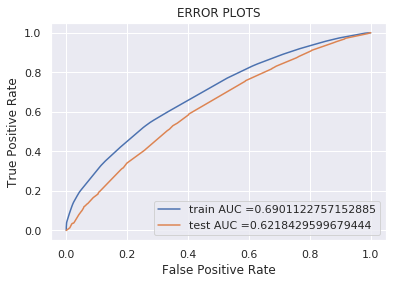

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
classifiers4 = GridSearchCV( DecisionTreeClassifier(class_weight = 'balanced'),best_tune_parameters)
clss4 = DecisionTreeClassifier(max_depth=10, min_samples_split=500, class_weight = 'balanced')
classifiers4.fit(X_set5_train, ytrain)
clss4.fit(X_set5_train, ytrain)
classifiers3.fit(X_set5_train, ytrain)
y_train_pred3 = classifiers4.predict_proba(X_set5_train) [:,1]
y_test_pred3 = classifiers4.predict_proba(X_set5_test) [:,1]
train_fpr3, train_tpr3, tr_thresholds3 = roc_curve(ytrain, y_train_pred3)
test_fpr3, test_tpr3, te_thresholds3 = roc_curve(ytest, y_test_pred3)
plt.plot(train_fpr3, train_tpr3, label="train AUC ="+str(auc(train_fpr3, train_tpr3)))
plt.plot(test_fpr3, test_tpr3, label="test AUC ="+str(auc(test_fpr3, test_tpr3)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

the maximum value of tpr*(1-fpr) 0.4 for threshold 0.47
the maximum value of tpr*(1-fpr) 0.35 for threshold 0.49


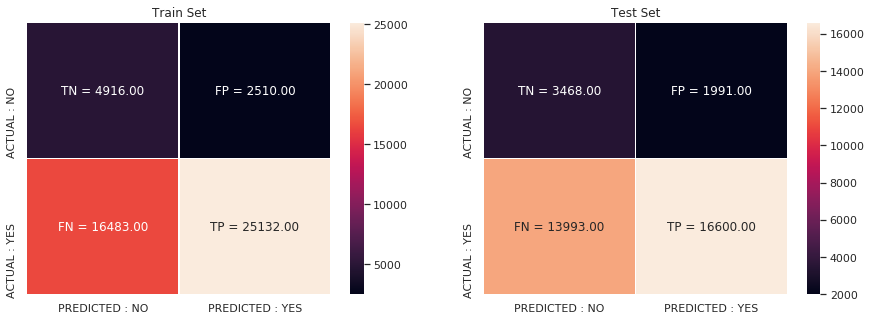

In [0]:
import seaborn as sns
import numpy as np
sns.set()
from sklearn.metrics import confusion_matrix
con_m_train = confusion_matrix(ytrain, predict(y_train_pred3, tr_thresholds3, train_fpr3, train_tpr3))
con_m_test = confusion_matrix(ytest, predict(y_test_pred3, te_thresholds3, test_fpr3, test_tpr3))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_m_test.flatten())])).reshape(2,2)
sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

In [0]:
fpi = []
for i in range(len(ytest)) :
  if (ytest[i] == 0) & (predictions1[i] == 1) :
    fpi.append(i)
fp_essay1 = []
for i in fpi :
  fp_essay1.append(xtest['essay'].values[i])

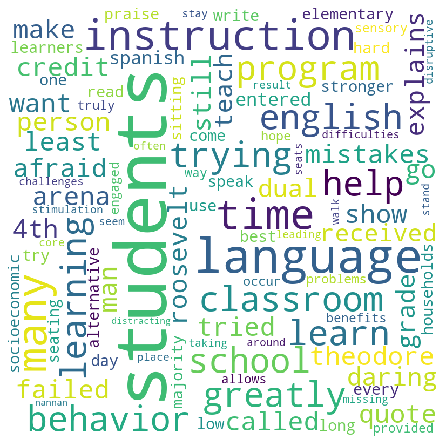

In [0]:
# Word cloud of essay
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay1 :
  val = str(val)
  tokens = val.split()
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
for words in tokens :
  comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,
min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

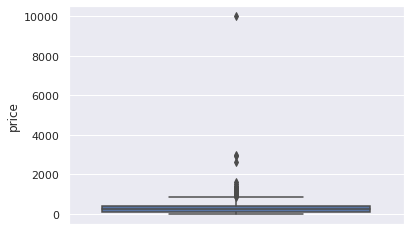

In [0]:
#Box Plot (FP 'price')
# first get the columns:
cols = xtest.columns
X_test_falsePos2 = pd.DataFrame(columns=cols)
# get the data of the false pisitives
for i in fpi : # (in fpi all the false positives data points indexes)
  X_test_falsePos2 = X_test_falsePos2.append(xtest.filter(items=[i], axis=0))
sns.boxplot(y='price', data=X_test_falsePos2)

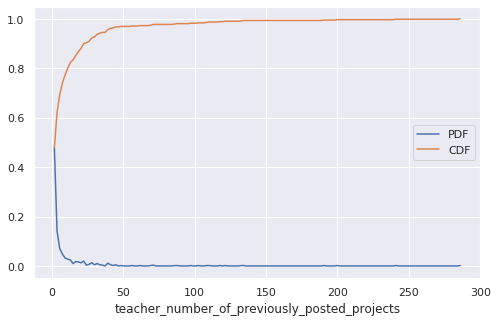

In [0]:
#PDF (FP ,teacher_number_of_previously_posted_projects)
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos2['teacher_number_of_previously_posted_projects'],bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()

<h1> Applying Decision trees on td_idf W2V

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
clss5 = DecisionTreeClassifier(criterion='gini', splitter='best', class_weight = 'balanced')
params = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}
classifier5 = GridSearchCV(clss5, params, cv=3, scoring='roc_auc',return_train_score=True)
mod5 = classifier5.fit(xtr3, ytrain)

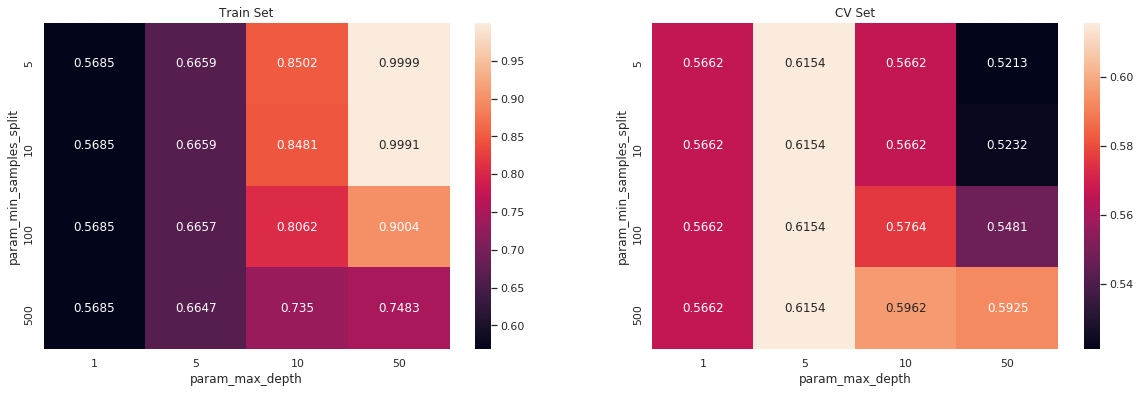

In [0]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set()
max_scores1 = pd.DataFrame(classifier5.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [0]:
print(classifier5.best_estimator_)
#Mean cross-validated score of the best_estimator
print(classifier5.score(xtr3, ytrain))
print(classifier5.score(xte3, ytest))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.6577961903031777
0.6184541058104285


In [0]:
# Best tune parameters
best_tune_parameters=[{'max_depth':[5], 'min_samples_split':[500] } ]

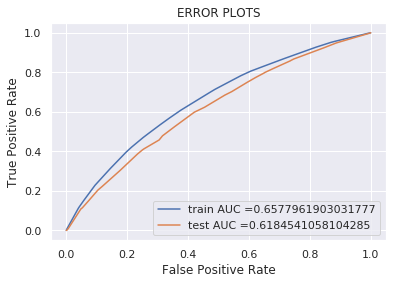

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
classifiers5 = GridSearchCV( DecisionTreeClassifier(class_weight = 'balanced'),best_tune_parameters)
clss5 = DecisionTreeClassifier(max_depth=5, min_samples_split=500, class_weight = 'balanced')
classifiers5.fit(xtr3, ytrain)
clss5.fit(xtr3, ytrain)
classifiers5.fit(xtr3, ytrain)
y_train_pred4 = classifiers5.predict_proba(xtr3) [:,1]
y_test_pred4 = classifiers5.predict_proba(xte3) [:,1]
train_fpr4, train_tpr4, tr_thresholds4 = roc_curve(ytrain, y_train_pred4)
test_fpr4, test_tpr4, te_thresholds4 = roc_curve(ytest, y_test_pred4)
plt.plot(train_fpr4, train_tpr4, label="train AUC ="+str(auc(train_fpr4, train_tpr4)))
plt.plot(test_fpr4, test_tpr4, label="test AUC ="+str(auc(test_fpr4, test_tpr4)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

the maximum value of tpr*(1-fpr) 0.38 for threshold 0.49
the maximum value of tpr*(1-fpr) 0.35 for threshold 0.49


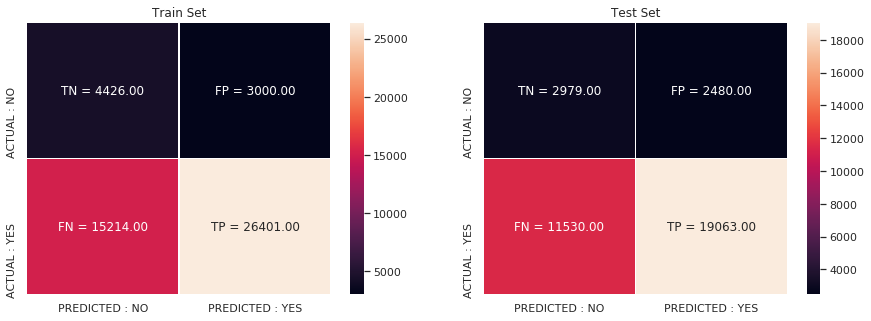

In [0]:
import seaborn as sns
import numpy as np
sns.set()
from sklearn.metrics import confusion_matrix
con_m_train = confusion_matrix(ytrain, predict(y_train_pred4, tr_thresholds4, train_fpr4, train_tpr4))
con_m_test = confusion_matrix(ytest, predict(y_test_pred4, te_thresholds4, test_fpr4, test_tpr4))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_m_test.flatten())])).reshape(2,2)
sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

In [0]:
fpi = []
for i in range(len(ytest)) :
  if (ytest[i] == 0) & (predictions1[i] == 1) :
    fpi.append(i)
fp_essay3 = []
for i in fpi :
  fp_essay3.append(xtest['essay'].values[i])

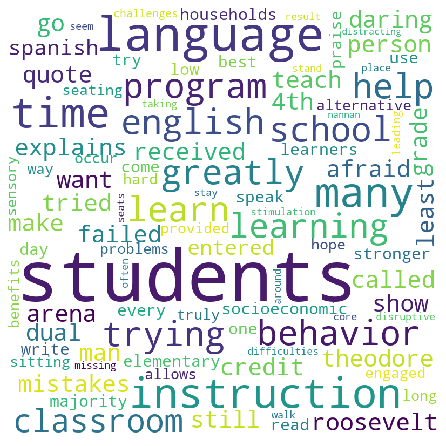

In [0]:
# Word cloud of essay
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay1 :
  val = str(val)
  tokens = val.split()
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
for words in tokens :
  comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,
min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

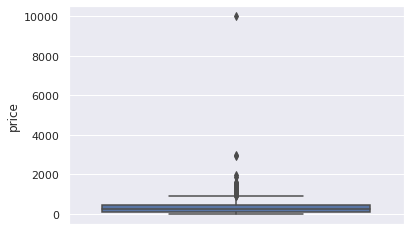

In [0]:
#Box Plot (FP 'price')
# first get the columns:
cols = xtest.columns
X_test_falsePos3 = pd.DataFrame(columns=cols)
# get the data of the false pisitives
for i in fpi : # (in fpi all the false positives data points indexes)
  X_test_falsePos3 = X_test_falsePos3.append(xtest.filter(items=[i], axis=0))
sns.boxplot(y='price', data=X_test_falsePos3)

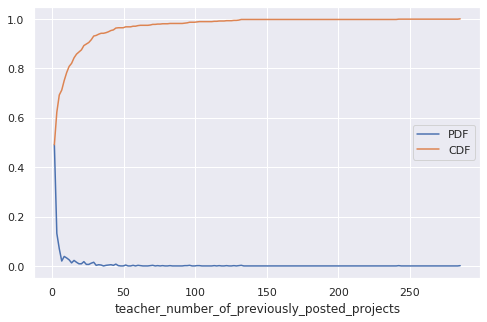

In [0]:
#PDF (FP ,teacher_number_of_previously_posted_projects)
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos3['teacher_number_of_previously_posted_projects'],bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()

<h1>Summary</h1>

In [0]:
# Please compare all your models using Prettytable library
#how to use pretty table http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
pt = PrettyTable()
pt.field_names= (" Vectorizer ", " Max_depth ", " Min_sample_split "," Test -AUC ")
pt.add_row([" BOW ", 10, 500, 61.60])
pt.add_row([" Tf - Idf", 10 , 500 ,62.22 ])
pt.add_row([" Tf - Idf weighted W2VC", 5 , 500 ,62.18 ])
pt.add_row(["Top 5000 Features", 10, 500 ,61.84 ])
print(pt.get_string(titles = "Decision trees- Observations"))

+-------------------------+-------------+--------------------+-------------+
|        Vectorizer       |  Max_depth  |  Min_sample_split  |  Test -AUC  |
+-------------------------+-------------+--------------------+-------------+
|           BOW           |      10     |        500         |     61.6    |
|         Tf - Idf        |      10     |        500         |    62.22    |
|  Tf - Idf weighted W2VC |      5      |        500         |    62.18    |
|    Top 5000 Features    |      10     |        500         |    61.87    |
+-------------------------+-------------+--------------------+-------------+
